# Introduction to Logistic Regression

## Introduction

## Linear Reg approach

## Logistic Reg approach

## Log Odds

In [6]:
#EXAMPLE
import numpy as np


# Calculate odds_of_rain
odds_of_rain = 0.4/0.6
print(odds_of_rain)

# Calculate log_odds_of_rain
log_odds_of_rain=np.log(odds_of_rain)
print(log_odds_of_rain)


# Calculate odds_on_time
odds_on_time=0.9/0.1
print(odds_on_time)


# Calculate log_odds_on_time
log_odds_on_time=np.log(odds_on_time)
print(log_odds_on_time)

#odds when we calci it is always a positive number when we take log of it we get it to be between positive and negative infinite

0.6666666666666667
-0.4054651081081643
9.0
2.1972245773362196


## Sigmoid Function

In [ ]:
##example
# Import libraries and data
import pandas as pd
import numpy as np
codecademyU = pd.read_csv('codecademyU.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef*hours_studied  #so we fit model then find log odds ln(p/1-p) now to get p from it
print(log_odds)
    #output is array of log odds
# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds)/(1+np.exp(log_odds)) #to find p we use this
print(pred_probability_passing)
    #output is array of p

## Fitting the model in Sklearn

In [ ]:
#example
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression

cc_lr=LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)
#output is  
#[-0.13173123] intercet
#[[1.5100409  0.12002228]] coeff
#the above ka interpretation is that
#Both coefficients are positive, which makes sense: we expect students who study more and earn higher grades on the practice test to be more likely to pass the final exam. The coefficient on hours_studied is larger than the coefficient on practice_test, suggesting that hours_studied is more strongly associated with students’ probability of passing.



## Prediction in Sklearn

In [ ]:
#example
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))
#output is [0 1 0 1 1]

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test))
print(cc_lr.predict_proba(X_test)[:,1])#only one ka means classified ka(to -ve ,to +ve prob) but gives only to +ve ka when [:,1] written
# Print out the true outcomes for the test data
print(y_test)
#output is [0 1 0 0 1]
#got wrong for 4th one as 4th ka prob we see very near near 
#You should see that the fourth datapoint was incorrectly classified as having passed the exam; however, the predicted probability of passing for this datapoint was only 57.7%, which is much lower than the other students who were correctly predicted to pass the exam (79.3% and 87.1%, respectively).


## Classification Threshold

## Confusion Matrix

In [ ]:
#example
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix here
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred,y_test)) #output is [[2 0] [1 2]]



## Accuracy, Precision, Recall, F1

In [ ]:
#example
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 51)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix
from sklearn.metrics import confusion_matrix
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred)) # output is [[3 1] [0 1]]

# Print accuracy here:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))# got 0.8

# Print F1 score here:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))#gor 0.66

## Review

## Project-Log reg for breast cancer

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [22]:
df=pd.read_csv('Cancer_detection_KNN.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
df=df.drop('Unnamed: 32',axis=1)

In [24]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [27]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
df.shape

(569, 32)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [31]:
scaler = StandardScaler()
def scale(X):
    for col in X.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))#remeber vvip
    return df
X=scale(X)

In [32]:
X

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [35]:
X=X.drop('diagnosis',axis=1)

In [36]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred=log.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred))

1.0


In [41]:
print(confusion_matrix(y_test,y_pred))

[[70  0]
 [ 0 44]]


<Axes: >

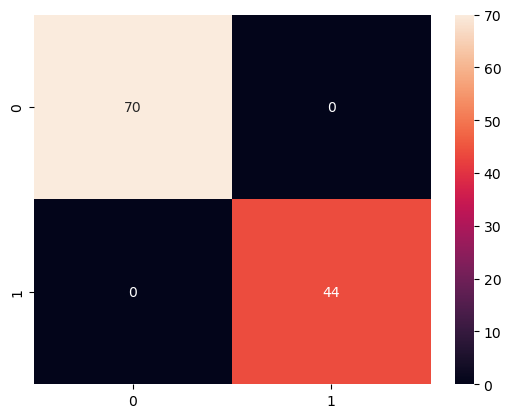

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

got accuracy of 100%

## Assumptions of Logistic Regression I

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

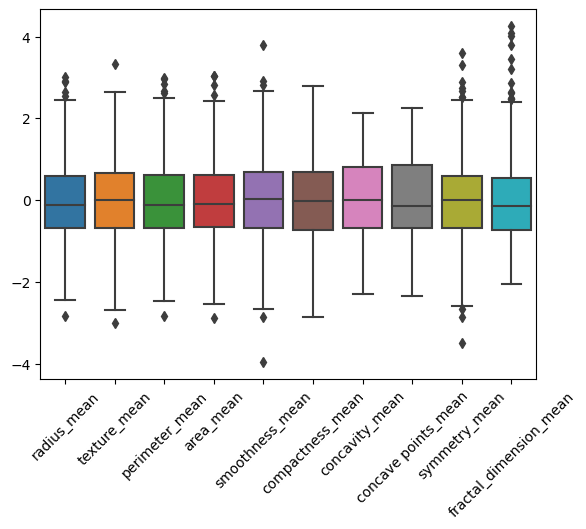

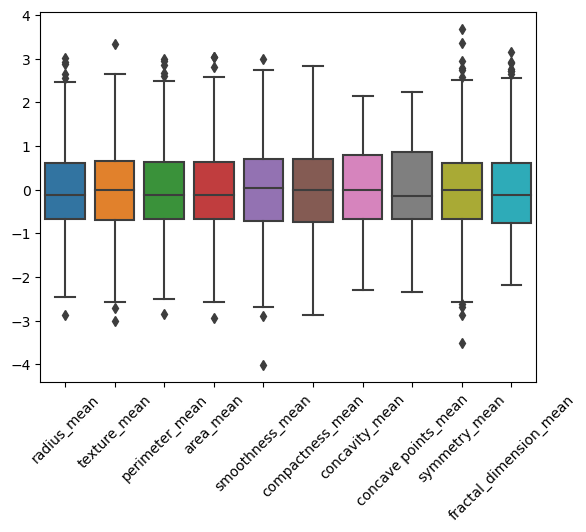

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler #not currently used
from scipy.stats import zscore #not needed but built in
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

print(df.head())

#imports/load data
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df.head()


#so we need to take care of certian things when doing the log regression

#1. Print distinct diagnosis values and frequency in dataset
print(df['diagnosis'].value_counts())

#2. Test if the number of unique IDs is equal to sample size, i.e. no repeated patients
print(df['id'].nunique()==df['id'].count())
#output is true
#3. At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features=(df['diagnosis'].value_counts().min())/10
print(max_features)#using thumb rule smalest of class size divided by 10 will be max features(here some 21.2 so no 21features so good)

#seeing and removing if any outlier is present
#4. Uncomment the code to see which features have extreme outliers:
sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()

#5. Uncomment the code to remove the samples with extreme fractal_dimensions_mean values:
q_hi  = df["fractal_dimension_mean"].quantile(0.99)
df_filtered = df[(df["fractal_dimension_mean"] < q_hi)]

#6. Run the boxplot again but with the filtered dataframe:
sns.boxplot(data=np.log(df_filtered[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()
#observe decreasing number of outliers

## Assumptions of Logistic Regression II

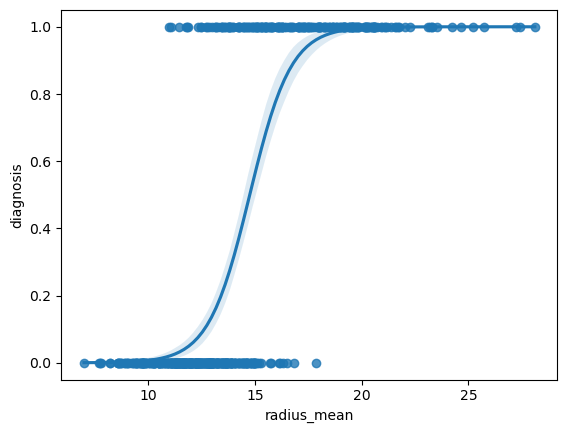

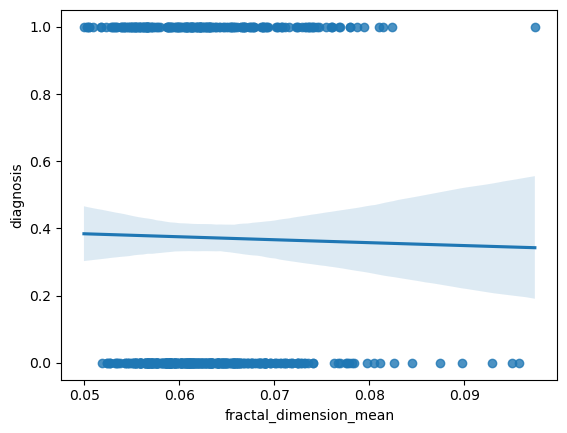

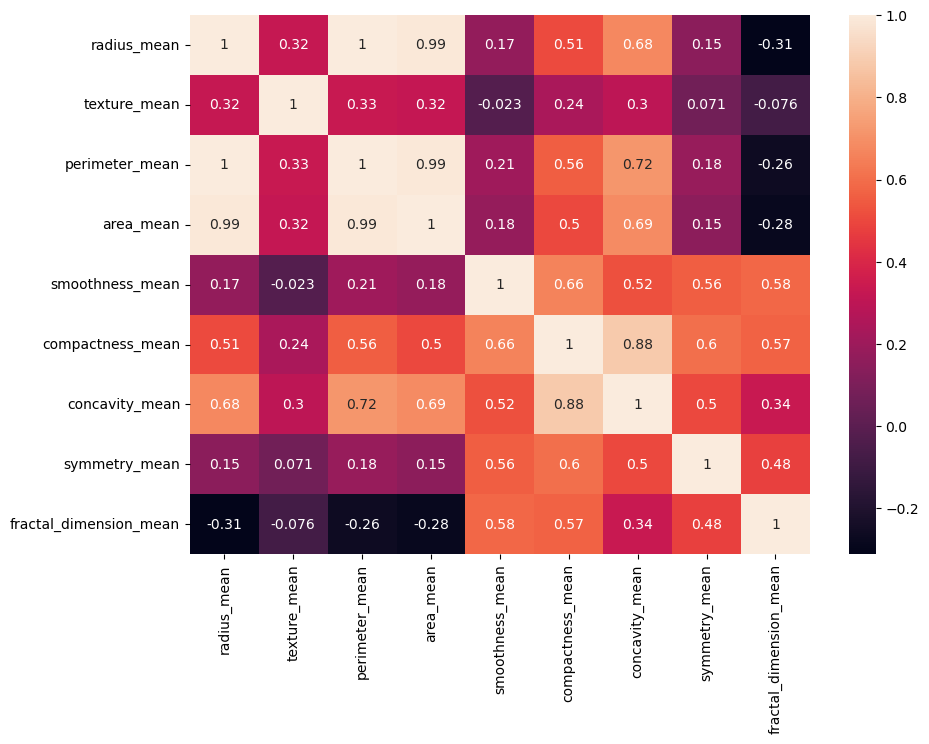

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
x = df[predictor_var]

#Compare the curves
sns.regplot(x= 'radius_mean', y= 'diagnosis', data= df, logistic= True,)#to see if features are linear related to output feature-if yes we get the sigmoid cureve using the regplot
plt.show()
plt.close()
sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()
plt.close()

#1 Uncomment the heatmap and identify the two features that are highly correlated with radius_mean.
plt.figure(figsize = (10,7))
sns.heatmap(x.corr(), annot=True)
plt.show()#to avoid multicolinearity we need to remove one feature that is highly correlated so plot heatmap

#2. Identify the other highly correlated pair. Define an array called correlated_pair containing the two features you've identified.
correlated_pair=['compactness_mean','concavity_mean']

## `scikit-learn` Implementation

In [5]:
# Hyperparameters is when you set the parameters before training the model.-so we tune this to get the best result
#parameters is the result we get from the model->in this case it is the weights(coef),intercept
#but in sklearn hyperparameters are mentioned as parameters
#evaluation metrics of importance depends on our case senerioa

In [6]:
#Example
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

#1. Fit a Logsitic Regression model with the specified hyperparameters
log_reg=LogisticRegression(penalty='none',fit_intercept=True)#this is setting hyperparameters
print(log_reg.get_params())#getting hyperparameters(see says get_params) learn other hyperpara and see
#2. Fit the model to training data and obtain cofficient and intercept
log_reg.fit(x_train,y_train)
coefficients=log_reg.coef_
intercept=log_reg.intercept_
print(coefficients)
print(intercept)#printing parameters


#3. Calculate the accuracy, precision, recall, and f1-score on the testing data
y_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)#evaluation metrices
print(f'Test set accuracy:\t{accuracy}')
print(f'Test set precision:\t{precision}')
print(f'Test set recall:\t{recall}')
print(f'Test set f1-score:\t{f1}')

#4. Remove the comments from the following code block to print the confusion matrix
test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred), 
     index=['actual no', 'actual yes'], 
     columns=['predicted no', 'predicted yes']
)#getting the confusion matrix(Learn like this)

print(test_conf_matrix)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[ 1.07991529  0.28744917 30.96010078 29.9725165 ]]
[-30.15566409]
Test set accuracy:	0.9064327485380117
Test set precision:	0.8507462686567164
Test set recall:	0.9047619047619048
Test set f1-score:	0.8769230769230769
            predicted no  predicted yes
actual no             98             10
actual yes             6             57


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## Prediction Threshold

In [8]:
#example of selecting proper threshold
import pandas as pd
import numpy as np

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)


log_reg = LogisticRegression(penalty='none', fit_intercept=True,tol=0.0000001,solver='newton-cg')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)#getting probabilites for each



#Using the predicted probabilities to get the predicted class
y_pred_class = (y_pred_prob[:,1]>0.5)*1.0#setting threshold ourselves and seeing
#1 Check if it's the same as y_pred
diff=np.array_equal(y_pred_class,y_pred)
print(diff)

#now for various checking the cm

## 2. Print the confusion matrix
print("Confusion Matrix: Threshold 50%")
cm_50 = confusion_matrix( y_test, y_pred_class)
print(cm_50)

##3 Confusion matrices for thresholds of 0.25 and 0.75
print("Confusion Matrix: Threshold 25%")
predicted_class=(y_pred_prob[:,1]>0.25)*1.0
cm_25 = confusion_matrix( y_test, predicted_class)
print(cm_25)
print("Confusion Matrix: Threshold 75%")
predicted_class=(y_pred_prob[:,1]>0.75)*1.0
cm_75 = confusion_matrix( y_test, predicted_class)
print(cm_75)

#4. Choosing the right threshold for a question(we see where we have the minimum false negatives)(for this case)

#Array of thresholds
thresh = np.linspace(0,1,100)
false_negatives = []

for t in thresh:
  cm = confusion_matrix(y_test, (y_pred_prob[:,1]>t)*1.0)
  false_negatives.append(cm[1][0])

thresh_choice = thresh[np.argmax(np.array(false_negatives)>=2)]
print(thresh_choice)

True
Confusion Matrix: Threshold 50%
[[98 10]
 [ 6 57]]
Confusion Matrix: Threshold 25%
[[94 14]
 [ 2 61]]
Confusion Matrix: Threshold 75%
[[104   4]
 [ 11  52]]
0.22222222222222224


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## ROC and AUC 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


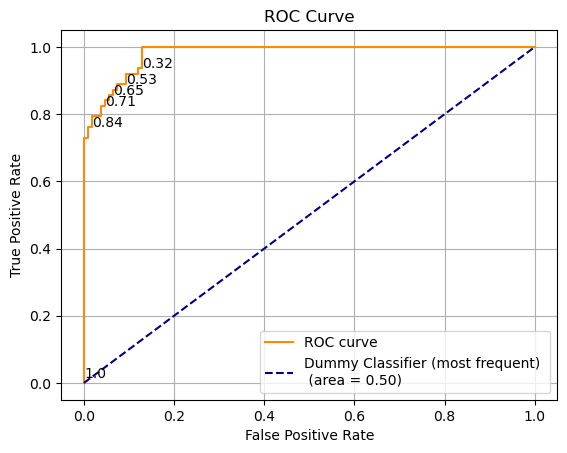

0.9810405643738976


In [10]:
#Learning plotting roc and auc and choose best threshold and understand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

log_reg = LogisticRegression(penalty='none', fit_intercept=True,tol=0.0000001,solver='newton-cg')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)
###################################################################
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

#1. Run the code

#2. Find ROC_AUC score and print it
roc_auc=roc_auc_score(y_test, y_pred_prob[:,1])
print(roc_auc)

## Class Imbalance

In [11]:
##Learning how to no imbalance and handle imbalance data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Cancer_detection_KNN.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean']
outcome_var='diagnosis'

x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=6, test_size=0.3)

print('Train positivity rate: ')
print(sum(y_train)/y_train.shape[0])
print('Test positivity rate: ')
print(sum(y_test)/y_test.shape[0])

log_reg = LogisticRegression(penalty='none', max_iter=1000, fit_intercept=True, tol=0.000001)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Recall and Accuracy scores')
print(recall, accuracy)

## 1. Stratified Sampling
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(df[predictor_var], df[outcome_var], random_state=6, test_size=0.3, stratify=df[outcome_var])

### 2. Stratified positivity rates
print('Stratified train positivity rate: ')
str_train_positivity_rate = sum(y_train_str)/y_train_str.shape[0]
print(str_train_positivity_rate)

print('Stratified test positivity rate: ')
str_test_positivity_rate = sum(y_test_str)/y_test_str.shape[0]
print(str_test_positivity_rate)

### 3. Model predictions after Stratified sampling 
log_reg.fit(x_train_str, y_train_str)
y_pred = log_reg.predict(x_test_str)
recall_str = recall_score(y_test_str, y_pred)
accuracy_str = accuracy_score( y_test_str, y_pred)

print('Stratified Sampling: Recall and Accuracy scores')
print(recall_str, accuracy_str)


### 4. Balanced Class Weights
log_reg_bal = LogisticRegression(penalty='none', max_iter=1000, fit_intercept=True, tol=0.000001, class_weight='balanced')

### 5. Model Predictions after balancing Class Weights
log_reg_bal.fit(x_train, y_train)
y_pred = log_reg_bal.predict(x_test)

recall_bal = recall_score(y_test, y_pred)
accuracy_bal = accuracy_score( y_test, y_pred)
print('Balanced Class Weights: Recall and Accuracy scores')
print(recall_bal)
print(accuracy_bal)



Train positivity rate: 
0.34673366834170855
Test positivity rate: 
0.4327485380116959
Recall and Accuracy scores
0.8783783783783784 0.9181286549707602
Stratified train positivity rate: 
0.37185929648241206
Stratified test positivity rate: 
0.3742690058479532
Stratified Sampling: Recall and Accuracy scores
0.875 0.9239766081871345
Balanced Class Weights: Recall and Accuracy scores
0.9054054054054054
0.9239766081871345


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
